### Обучение с учителем в Scikit-learn

#### Импортируйте библиотеки pandas и numpy.

In [41]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

#### Задание 1

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X, y = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]), raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

lr = LinearRegression()

lr.fit( X_train, y_train )

print(f"R2(без predict) {lr.score(X_test, y_test)}")

y_pred_lr = lr.predict( X_test )

print(f"R2(c predict) {r2_score( y_test, y_pred_lr) }" )

R2(без predict) 0.7112260057484909
R2(c predict) 0.7112260057484909


#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
rfr.fit(X_train, y_train)

print(f"R2(без predict) {rfr.score(X_test, y_test)}")

y_pred_rfr = rfr.predict( X_test )

print(f"R2(c predict) {r2_score( y_test, y_pred_rfr) }" )

R2(без predict) 0.87472606157312
R2(c predict) 0.87472606157312


Text(0.5, 1.0, 'RandomForestRegressor')

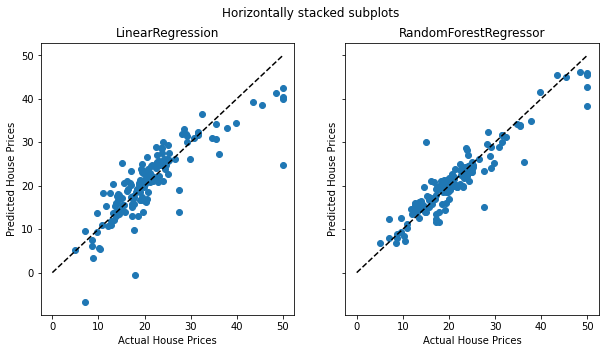

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5), sharex='all', sharey='all')
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(y_test, y_pred_lr)
ax1.plot([0, 50], [0, 50], '--k')
ax1.set_xlabel("Actual House Prices")
ax1.set_ylabel("Predicted House Prices")
ax1.set_title("LinearRegression")

ax2.scatter(y_test, y_pred_rfr)
ax2.plot([0, 50], [0, 50], '--k')
ax2.set_xlabel("Actual House Prices")
ax2.set_ylabel("Predicted House Prices")
ax2.set_title("RandomForestRegressor")

Алгоритм "Случайный лес" показывает более точные результаты, чем "линейная регрессия". 

####  Задание 3

Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.


In [36]:
print(rfr.feature_importances_)

[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]


In [45]:
#  Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population

feature_importance = pd.DataFrame({'name':['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
                                   'feature_importance':rfr.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.031676,CRIM
1,0.001543,ZN
2,0.007138,INDUS
3,0.001236,CHAS
4,0.014269,NOX
5,0.402682,RM
6,0.014299,AGE
7,0.063973,DIS
8,0.005281,RAD
9,0.011525,TAX


In [46]:
feature_importance.nlargest(2, 'feature_importance')

,feature_importance,name
12,0.415847,LSTAT
5,0.402682,RM
